# AddisCoder: Week 2, Lecture 7b
## More Fun with Images: Advanced



In [2]:
# We start with our imports.
from simpleimage import SimpleImage
import random

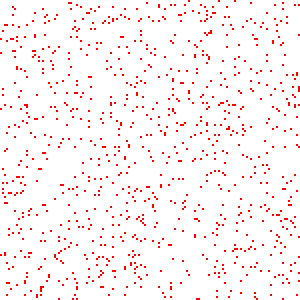

In [9]:
# Let's have some more fun with canvases, and make something pretty.

# First, let's make a canvas.
canvas = SimpleImage.blank(150, 150)

# Now, let's draw some random pixels on the canvas.
for i in range(1000):
    x = random.randrange(0, canvas.width)
    y = random.randrange(0, canvas.height)
    canvas.set_rgb(x, y, 255, 0, 0)

# Finally, let's show the canvas.
canvas.show(resize_width=300)

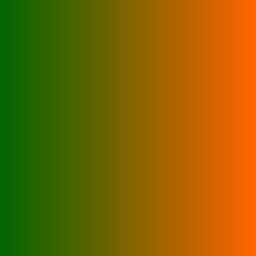

In [10]:
# My favorite thing to make is gradients. Let's make a gradient.
# A *gradient* is a smooth transition from one color to another.

gradient = SimpleImage.blank(256, 256)
for x in range(gradient.width):
    for y in range(gradient.height):
        gradient.set_rgb(x, y, red=x, green=100, blue=0) 

gradient.show()

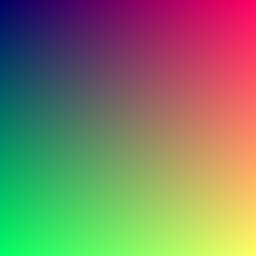

In [21]:
# We can play with the gradient settings to be more fun.
gradient = SimpleImage.blank(256, 256)
for x in range(gradient.width):
    for y in range(gradient.height):
        gradient.set_rgb(x, y, red=x, green=y, blue=100) 

gradient.show()

## Working with Real Images

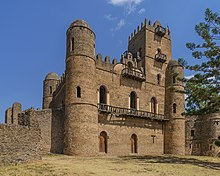

In [2]:
castle = SimpleImage('images/castle.jpg')
castle.show()

In [3]:
# Can we modify the image just like how we modified the canvas before. Let's add some stripes.

# Let's hide some pixels at random.

def add_static(image):
    for x in range(image.width):
        for y in range(image.height):
            if random.random() < 0.2:
                image.set_rgb(x, y, 255, 255, 255)
    return image

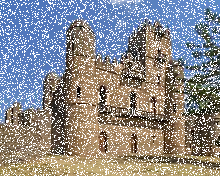

In [4]:
# Cool!!
castle = SimpleImage('images/castle.jpg')
add_static(castle).show()

In [5]:
# More advanced static: salt and pepper (black and white)

def salt_and_pepper(image):
    for x in range(image.width):
        for y in range(image.height):
            random_number = random.random()
            if random_number < 0.05:
                # Make a pixel white with 5% probability
                image.set_rgb(x, y, 255, 255, 255)
            elif random_number > 0.05 and random_number < 0.1:       # By the way, do we _need_ the first half of the condition?
                # Make a pixel black with 5% probability
                image.set_rgb(x, y, 0, 0, 0)
            # Otherwise do nothing
    return image

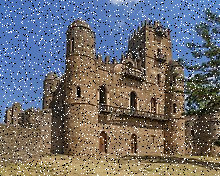

In [6]:
castle = SimpleImage('images/castle.jpg')
salt_and_pepper(castle).show()

In [9]:
# Let's add a red filter to the image
def red_tint(image):
    for y in range(image.height):
        for x in range(image.width):
            pixel = image.get_rgb(x, y)
            image.set_rgb(x, y, 255, pixel[1], pixel[2])
    return image

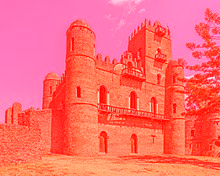

In [10]:
castle = SimpleImage('images/castle.jpg')
red_tint(castle).show()

In [11]:
# Let's add some stripes?
def add_stripes(image):
    for y in range(image.height):
        for x in range(image.width):
            if x % 6 == 0:
                image.set_rgb(x, y, 255, 255, 255)
    return image

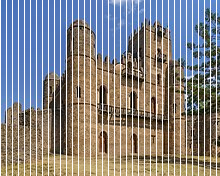

In [12]:
castle = SimpleImage('images/castle.jpg')
add_stripes(castle).show()

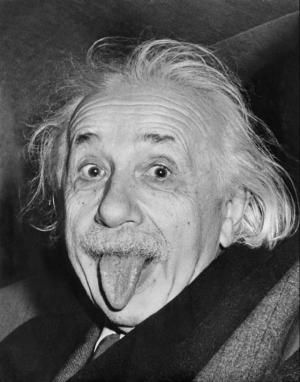

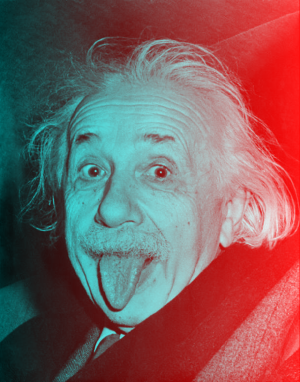

In [23]:
# We can overlay gradients on images.

einstein = SimpleImage("images/einstein.jpg")
einstein.show(resize_width=300)

def red_gradient_filter(image):
    for x in range(image.width):
        for y in range(image.height):
            pixel = image.get_rgb(x, y)
            red = int((x / image.width) * 255)
            green = pixel[1]
            blue = pixel[2]
            image.set_rgb(x, y, red, green, blue)
    return image
red_gradient_filter(einstein).show(resize_width=300)


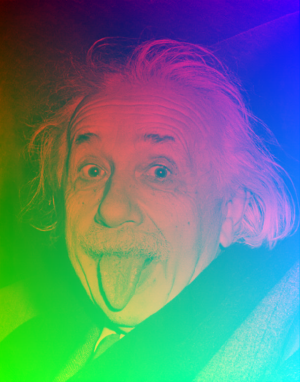

In [25]:
# let's write a function that makes the image look like it's underwater.
def underwater(image):
    for x in range(image.width):
        for y in range(image.height):
            pixel = image.get_rgb(x, y)
            red = pixel[0]
            green = int((y / image.height) * 255)
            blue = int((x / image.width) * 255)
            image.set_rgb(x, y, red, green, blue)
    return image
einstein = SimpleImage("images/einstein.jpg")
underwater(einstein).show(resize_width=300)

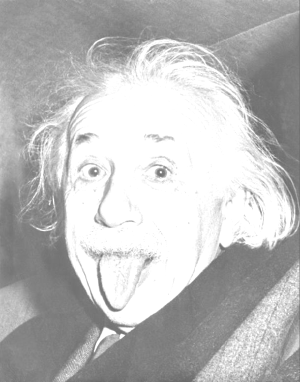

In [26]:
# One more fun one: let's make a brighten filter.
def brighten(image):
    for x in range(image.width):
        for y in range(image.height):
            pixel = image.get_rgb(x, y)
            red = min(pixel[0] + 100, 255)
            green = min(pixel[1] + 100, 255)
            blue = min(pixel[2] + 100, 255)
            image.set_rgb(x, y, red, green, blue)
    return image

einstein = SimpleImage("images/einstein.jpg")
brighten(einstein).show(resize_width=300)

Challenge question for your assignment this afternoon will be a _blur_ filter. 